### Artificial Neural Network - Farword Propagation

#### Objectives

* Initialize a network
* Calculate the weighted Sum at each node
* Compute Node activation

#### The network is given below

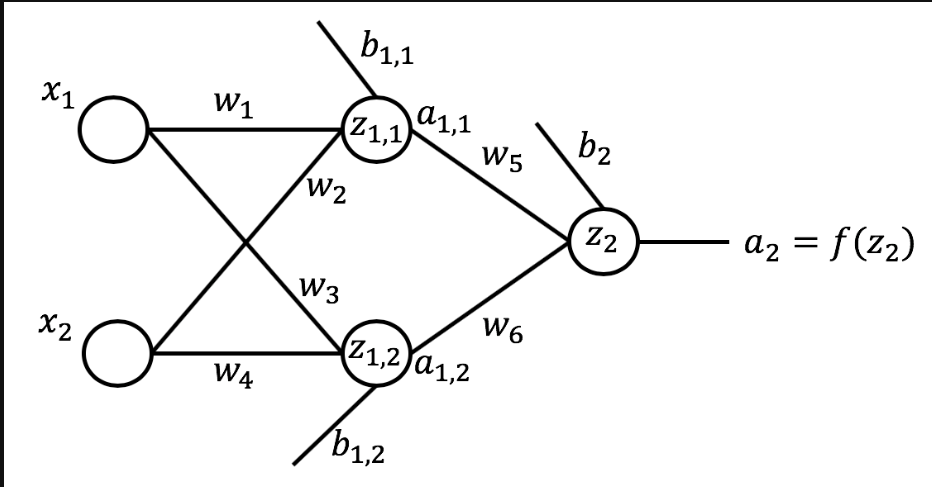

##### Initialize the weights and biases

In [1]:
import numpy as np

weights = np.around(np.random.uniform(size = 6 ), decimals = 2) 
biases = np.around(np.random.uniform(size = 3), decimals = 2)

Let's print the weights and biases

In [2]:
print(weights)
print(biases)

[0.88 0.06 0.77 0.13 0.42 0.32]
[0.66 0.36 0.01]


Now we have the wieghts and biases for a given network now lets compute the o/p for a given inputs $x_1$ and $x_2$

In [3]:
x_1 = 0.5
x_2 = 0.85

weighted Sum at the first node of hidden layer $Z_1,_1$

In [4]:
Z1_1 = weights[0]*x_1 + weights[1]*x_2 + biases[0]
Z1_2 = weights[2]*x_1 + weights[3]*x_2 + biases[1]

print('The wieghted sum at Node first: %.3f' %Z1_1, f'and at Node second:%.3f' %Z1_2)

The wieghted sum at Node first: 1.151 and at Node second:0.855


###### Activations at Nodes on Hidden Layer

In [5]:
a1_1 = 1/(1 + np.exp(-Z1_1))
a1_2 = 1/ ( 1 + np.exp(-Z1_2))

Now let's find $Z_2$

In [6]:
Z_2 = weights[4]*x_1 + weights[5]*x_2 + biases[2]

###### Activation at last node

In [7]:
a_2 = 1/(1 + np.exp(-Z_2))

Obviously, neural networks for real problems are composed of many hidden layers and many more nodes in each layer. So, we can't continue making predictions using this very inefficient approach of computing the weighted sum at each node and the activation of each node manually.

In order to code an automatic way of making predictions, let's generalize our network. A general network would take  $𝑛$ inputs, would have many hidden layers, each hidden layer having  $m$ nodes, and would have an output layer. Although the network is showing one hidden layer, but we will code the network to have many hidden layers. Similarly, although the network shows an output layer with one node, we will code the network to have more than one node in the output layer.

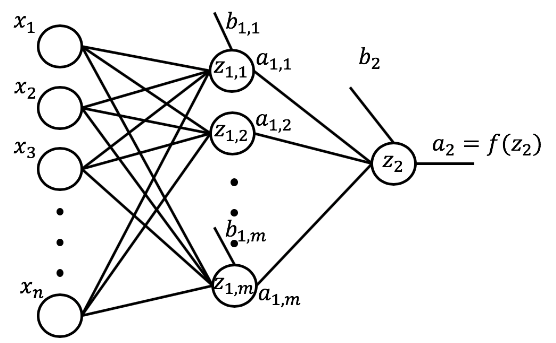

Structure of the network

In [57]:
num_inputs = 2   # no of inputs
num_hidden_layers = 2   # No of hidden Layers
m = [2, 2]       # No of nodes in Each hidden layer
num_outputs = 1           # No of output nodes

Now that we defined the structure of the network, let's go ahead and inititailize the weights and the biases in the network to random numbers. In order to be able to initialize the weights and the biases to random numbers, we will need to import the Numpy library.

In [58]:
import numpy as np

no_of_nodes_previous = num_inputs  # No of nodes in previous layer
network = {}    # Initialize the network to a dictionary

for layer in range(num_hidden_layers + 1):
    
    if layer == num_hidden_layers:
        layer_name = 'output layer'
        num_nodes = num_outputs  #No of nodes in output layer
        
    else:
        layer_name = f'layer_{layer + 1}'
        num_nodes = m[layer]
        
    #initialize weights and biases assocciated with nodes in the current layers
    network[layer_name] = {}
    
    for node in range(num_nodes):
        node_name = f'node_{node+1}'
        network[layer_name][node_name] = {
        'weights' : np.around(np.random.uniform(size = no_of_nodes_previous), decimals = 2),
        'biases' : np.around(np.random.uniform(size = 1), decimals = 2)
            
        }
    
    no_of_nodes_previous = num_nodes
    


{'weights': array([0.73, 0.12]), 'biases': array([0.32])}
{'weights': array([0.39, 0.04]), 'biases': array([0.16])}
{'weights': array([0.17, 0.77]), 'biases': array([0.24])}
{'weights': array([0.75, 0.35]), 'biases': array([0.66])}
{'weights': array([0.65, 0.23]), 'biases': array([0.42])}


Awesome! So now with the above code, we are able to initialize the weights and the biases pertaining to any network of any number of hidden layers and number of nodes in each layer. But let's put this code in a function so that we are able to repetitively execute all this code whenever we want to construct a neural network.

In [116]:
def initialize_network(num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):
    
    no_of_nodes_previous = num_inputs  # No of nodes in previous layer, at start it would be equal to number of inputs
    network = {}    # Initialize the network to a dictionary

    for layer in range(num_hidden_layers + 1):

        if layer == num_hidden_layers:   
            layer_name = 'output layer'    # Name the last layer in the network
            num_nodes = num_nodes_output   # No of nodes in output layer

        else:
            layer_name = f'layer_{layer + 1}'   # Otherwise name layers of network
            num_nodes = num_nodes_hidden[layer]

        #initialize weights and biases assocciated with nodes in the current layers
        network[layer_name] = {}

        for node in range(num_nodes):
            node_name = f'node_{node+1}'
            network[layer_name][node_name] = {
            'weights' : np.around(np.random.uniform(size = no_of_nodes_previous), decimals = 2),
            'bias' : np.around(np.random.uniform(size = 1), decimals = 2)

            }

        no_of_nodes_previous = num_nodes
        
    return network


#### Use the *initialize_network* function to create a network that:

1. takes 5 inputs
2. has three hidden layers
3. has 3 nodes in the first layer, 2 nodes in the second layer, and 3 nodes in the third layer
4. has 1 node in the output layer

Call the network **small_network**.

In [60]:
small_network = initialize_network(5, 3, [3, 2, 3], 1)

### Compute Weighted Sum at Each Node

The $ weighted~Sum $ at each node is calculated as the dot product of inputs and weight plus bias. so let's create a fuction called *__compute_weighted_sum__*

In [96]:
def compute_weighted_sum(inputs, weights, biase):
    return np.sum(inputs*weights) + biase

Let's generate random inputs for the network with 5 inputs

In [97]:
np.random.seed(12)
inputs = np.around(np.random.uniform(size = 5), decimals = 2)

##### Use the compute_weighted_sum function to compute the weighted sum at the first node in the first hidden layer.

In [85]:
weights = small_network['layer_1']['node_1']['weights']
bias = small_network['layer_1']['node_1']['bias']
compute_weighted_sum(inputs, weights, bias)


numpy.ndarray

## Compute Node Activation

Recall that the output of each node is simply a non-linear tranformation of the weighted sum. We use activation functions for this mapping. Let's use the sigmoid function as the activation function here. So let's define a function that takes a weighted sum as input and returns the non-linear transformation of the input using the sigmoid function.

In [98]:
def node_activation(weighted_sum):
    return 1/(1 + np.exp(-weighted_sum))


#### Use the node_activation function to compute the output of the first node in the first hidden layer.

In [65]:
first_node_act = node_activation(compute_weighted_sum(inputs, weights, bias))
first_node_act

array([0.83648447])

### Farword Propagation

The final piece of building a neural network that can perform predictions is to put everything together. So let's create a function that applies the compute_weighted_sum and node_activation functions to each node in the network and propagates the data all the way to the output layer and outputs a prediction for each node in the output layer.

The way we are going to accomplish this is through the following procedure:
1. Start with the input layer as the input to the first hidden layer.
2. Compute the weighted sum at the nodes of the current layer.
3. Compute the output of the nodes of the current layer.
4. Set the output of the current layer to be the input to the next layer.
5. Move to the next layer in the network.
5. Repeat steps 2 - 4 until we compute the output of the output layer.


In [128]:
def forward_propagate(inputs, network):
    
    layer_inputs = list(inputs)   # start with the input layer as the input to the first hidden layer
    
    for layer in network:   # iterate through all the layers
        layer_outputs = []          # Activation values calculated at each layer
        
        for node in network[layer]:
            
            weights = network[layer][node]['weights']
            bias = network[layer][node]['bias']
            weighted_sum = compute_weighted_sum(layer_inputs, weights, bias)    # weighted sum at each node
            activation = node_activation(weighted_sum)                    # Node activation at each node
            layer_activations.append(np.around(activation[0], decimals = 4))

        layer_inputs = layer_outputs
        
        
    netword_prediction = layer_output
    return network_prediction
        

In [141]:
np.random.seed(12)
inputs = np.around(np.random.uniform(size = 5), decimals = 2)
small_network = initialize_network(5, 3, [3, 2, 3], 1)
# print(f'inputs:{inputs}')
# print(f'output: {forward_propagate(inputs, small_network)}')

#### Putting all the code together

In [ ]:
import numpy as np

def initialize_network(num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):
    
    no_of_nodes_previous = num_inputs  # No of nodes in previous layer, at start it would be equal to number of inputs
    network = {}    # Initialize the network to a dictionary

    for layer in range(num_hidden_layers + 1):

        if layer == num_hidden_layers:   
            layer_name = 'output layer'    # Name the last layer in the network
            num_nodes = num_nodes_output   # No of nodes in output layer

        else:
            layer_name = f'layer_{layer + 1}'   # Otherwise name layers of network
            num_nodes = num_nodes_hidden[layer]

        #initialize weights and biases assocciated with nodes in the current layers
        network[layer_name] = {}

        for node in range(num_nodes):
            node_name = f'node_{node+1}'
            network[layer_name][node_name] = {
            'weights' : np.around(np.random.uniform(size = no_of_nodes_previous), decimals = 2),
            'bias' : np.around(np.random.uniform(size = 1), decimals = 2)

            }

        no_of_nodes_previous = num_nodes
        
    return network

def compute_weighted_sum(inputs, weights, biase):
    return np.sum(inputs*weights) + biase

def node_activation(weighted_sum):
    return 1/(1 + np.exp(-weighted_sum))

def forward_propagate(inputs, network):
    
    layer_inputs = list(inputs)   # start with the input layer as the input to the first hidden layer
    
    for layer in network:   # iterate through all the layers
        layer_outputs = []          # Activation values calculated at each layer
        
        for node in network[layer]:
            
            weights = network[layer][node]['weights']
            bias = network[layer][node]['bias']
            weighted_sum = compute_weighted_sum(layer_inputs, weights, bias)    # weighted sum at each node
            activation = node_activation(weighted_sum)                    # Node activation at each node
            layer_outputs.append(np.around(activation[0], decimals = 4))

        layer_inputs = layer_outputs
        
        
    network_prediction = layer_outputs
    return network_prediction

np.random.seed(12)
inputs = np.around(np.random.uniform(size = 5), decimals = 2)

small_network = initialize_network(5, 3, [3, 2, 3], 1)

print(f'inputs:{inputs}')
print(f'output: {forward_propagate(inputs, small_network)}')

#### Rewritting the code in OOP

In [145]:
import numpy as np

class Neural_Network:
    
    # constructor method
    def __init__(self, num_inputs, num_hidden_layers, num_nodes_hidden, num_nodes_output):
        self.num_inputs = num_inputs
        self.num_hidden_layers = num_hidden_layers
        self.num_nodes_hidden = num_nodes_hidden
        self.num_nodes_output = num_nodes_output
        
        self.network = {}   # Initialize the network to a dictionary
     
    #Instance Method
    def initialize_network(self):
    
        no_of_nodes_previous = self.num_inputs  # No of nodes in previous layer, at start it would be equal to number of inputs
        
        for layer in range(self.num_hidden_layers + 1):

            if layer == self.num_hidden_layers:   
                layer_name = 'output layer'    # Name the last layer in the network
                num_nodes = self.num_nodes_output   # No of nodes in output layer

            else:
                layer_name = f'layer_{layer + 1}'   # Otherwise name layers of network
                num_nodes = self.num_nodes_hidden[layer]

            #initialize weights and biases assocciated with nodes in the current layers
            self.network[layer_name] = {}
            
            for node in range(num_nodes):
                node_name = f'node_{node+1}'
                self.network[layer_name][node_name] = {
                'weights' : np.around(np.random.uniform(size = no_of_nodes_previous), decimals = 2),
                'bias' : np.around(np.random.uniform(size = 1), decimals = 2)
                }

            no_of_nodes_previous = num_nodes

        return self.network
    
    # Method for calculating weighted sum at a node
    def compute_weighted_sum(self, inputs, weights, biase):
        return np.sum(inputs*weights) + biase

    # Method to calculate node activation at each node of the layer
    def node_activation(self, weighted_sum):
        return 1/(1 + np.exp(-weighted_sum))
    
    # Method for forward propagation
    def forward_propagate(self, inputs):
        
        network = self.initialize_network()
        layer_inputs = list(inputs)   # start with the input layer as the input to the first hidden layer

        for layer in network:   # iterate through all the layers
            layer_outputs = []          # Activation values calculated at each layer

            for node in network[layer]:

                weights = network[layer][node]['weights']
                bias = network[layer][node]['bias']
                weighted_sum = self.compute_weighted_sum(layer_inputs, weights, bias)    # weighted sum at each node
                activation = self.node_activation(weighted_sum)                    # Node activation at each node
                layer_outputs.append(np.around(activation[0], decimals = 4))

            layer_inputs = layer_outputs

        network_prediction = layer_outputs
        return network_prediction

np.random.seed(12)
inputs = np.around(np.random.uniform(size = 5), decimals = 2)

# Creating Instance of the class
N_network = Neural_Network(5, 3, [3, 2, 3])

output = N_network.forward_propagate(inputs)
print(f'inputs:{inputs}')
print(f'Output: {output}')

inputs:[0.15 0.74 0.26 0.53 0.01]
Output: [0.9112, 0.8123]
